In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import random

#plt.style.use('ggplot') # use "ggplot" style for graphs
random.seed()

In [65]:
# Function which generates state mu
def mu(a, r_2):
    sums = np.cumsum(a)
    a_0 = np.sum(a)
    
    # Find which value of mu is chosen
    for i in range(0, len(sums)):
        # The first value found will be the smallest one due to the nature of cumsum
        if sums[i] > r_2 * a_0:
            return i

# Function which returns correct values for u and v change depending on mu        
def mu_change(argument):
    switcher = {
        0: 1,
        1: -1,
    }
    return switcher.get(argument,"Invalid value of mu")

In [66]:
# Set parameters
num = 1000 # number of particles
steps = 5000 # number of steps

t = np.zeros(steps)
x = np.zeros((num,steps))

a = np.zeros(2)

# Find processes

# Step forward in x
a[0] = 0.25
# Step backward in x
a[1] = 0.25 
    
a_0 = np.sum(a)

In [67]:
# Official Gillespie loop
for j in range(num):
    for i in range(1,steps):
            
        r_2 = random.uniform(0,1)

        mu_temp = mu(a, r_2)
        
        factors = mu_change(mu_temp)
        
        if j == 0:
            t[i] = i
        x[j][i] = x[j][i-1] + factors

D = 0.48643722176 (Simulation via MSD)
Fitted D = 0.4756178364680733 in cm^2 min^-1


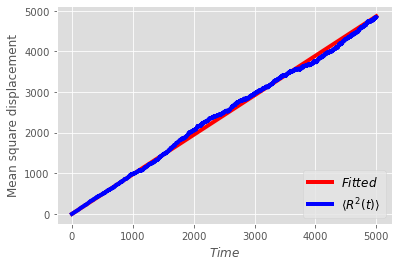

In [70]:
# Mean square displacement vs time
msd = np.mean(x**2, axis=0)

dmsd = np.trapz(msd, dx=1)/ (1*(steps*1)**2) # integrate using trapezoidal rule
print('D =',dmsd,'(Simulation via MSD)')

fit = np.polyfit(t, msd, 1)
print('Fitted D =',fit[0]/2,'in cm^2 min^-1')
d1 = fit[0]/2

predict = np.poly1d(fit)
theory = predict(t)

dmsdfit = 2*dmsd*t

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.set_xlabel(r"$Time$",fontsize=12)
ax.set_ylabel(r"Mean square displacement",fontsize=12)
#ax.plot(t,theory,'g',lw=4, label=r'$Fitted$')
ax.plot(t,dmsdfit,'r',lw=4, label=r'$Fitted$')
ax.plot(t, msd,'b',lw=4, label=r'$\langle R^2(t)\rangle$')
ax.legend(fontsize=12,loc=4)
plt.savefig('Figures/randwalk 1D msd.pdf', bbox_inches='tight')
plt.show()

<ipython-input-71-580f4d5bca68>:1: RuntimeWarning: invalid value encountered in true_divide
  ratio = dmsdfit/(theory-fit[1])


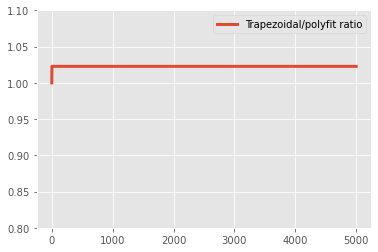

In [71]:
ratio = dmsdfit/(theory-fit[1])
ratio[0] = 1

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t,ratio,lw=3,label='Trapezoidal/polyfit ratio') # plot y/ya vs. t
ax.set_ylim(ymin=0.8, ymax= 1.1)
ax.legend() #display legends
plt.show() #display plots

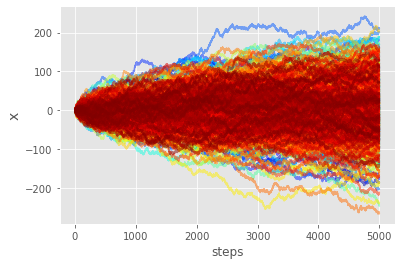

In [77]:
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,num)))

fig = plt.figure()
ax = fig.add_subplot(111)
for j in range(num):
    ax.plot(t, x[j], color=next(colors), alpha=0.5)
ax.set_xlabel('steps',fontsize=12)
ax.set_ylabel('x',fontsize=12)
plt.savefig('Figures/randwalk 1D visual.pdf', bbox_inches='tight')
plt.show()

-348
348
0
69.73807670961739


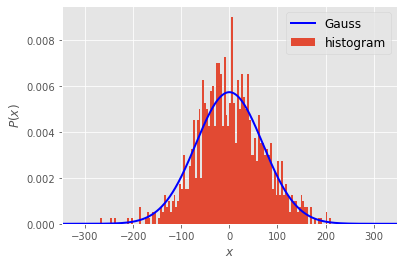

In [78]:
ave = 0 # Average position i.e. starting position
std = np.sqrt(2*dmsd*t[-1]) # Standard deviation i.e. sqrt(2Dt)

nmin=int(ave-std*5)
nmax=int(ave+std*5)
nbin=int((nmax-nmin)/4)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(x[:,steps-1],range=[nmin,nmax],bins=nbin,density=True, stacked=True) # plot normalized histogram of L

x1 = np.arange(nmin,nmax,0.01/std) # create array of x from nmin to nmax with increment y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) # calculate the theoretical plt.plot(x,y,lw=2,color='b') # plot y vs. x with blue line
y = np.exp(-(x1-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) # calculate the theoretical

print(nmin)
print(nmax)
print(ave)
print(std)

ax.plot(x1,y,lw=2,color='b') # plot y vs. x with blue line
#ax.set_title(r'x-axis particle distribution')
ax.set_xlabel(r'$x$',fontsize=12) # set x-label
ax.set_ylabel(r'$P(x)$',fontsize=12) # set y-label
ax.legend([r'Gauss',r'histogram'], fontsize=12, loc='upper right') # set legends
ax.set_xlim(nmin,nmax) # set x-range
plt.savefig('Figures/randwalk 1D x distr.pdf', bbox_inches='tight')
plt.show() # display plots